# Project 6 - EDA (Custom Data Analytics Project)

Author: Elom Gbogbo

Date: 2/21/2025

Purpose: The purpose of Project 6 is to create our own explortatory data analysis but using our own dataset to explore data analysis tools like pandas, seaborn, matpotlib using Jupyter. The dataset that will be analyzed in this project is a seaborn dataset about exercise. 

https://github.com/mwaskom/seaborn-data/blob/master/exercise.csv

# Step 1: Import Dependencies

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import jupyterlab
import pyarrow

# Step 2: Data Acquisition

In [43]:
# Load the dataset in into a padndas DataFrame
df = sns.load_dataset('exercise')

print(df.head())

   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest


# Step 3: Initial Data Inspection

In [44]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest
5           5   2  low fat     93  30 min  rest
6           6   3  low fat     97   1 min  rest
7           7   3  low fat     97  15 min  rest
8           8   3  low fat     94  30 min  rest
9           9   4  low fat     80   1 min  rest
(90, 6)
Unnamed: 0       int64
id               int64
diet          category
pulse            int64
time          category
kind          category
dtype: object


# Step 4. Initial Descriptive Statistics

In [45]:
print(df.describe())

       Unnamed: 0         id       pulse
count   90.000000  90.000000   90.000000
mean    44.500000  15.500000   99.700000
std     26.124701   8.703932   14.858471
min      0.000000   1.000000   80.000000
25%     22.250000   8.000000   90.250000
50%     44.500000  15.500000   96.000000
75%     66.750000  23.000000  103.000000
max     89.000000  30.000000  150.000000


# Step 5. Initial Data Distribution for Numerical Columns

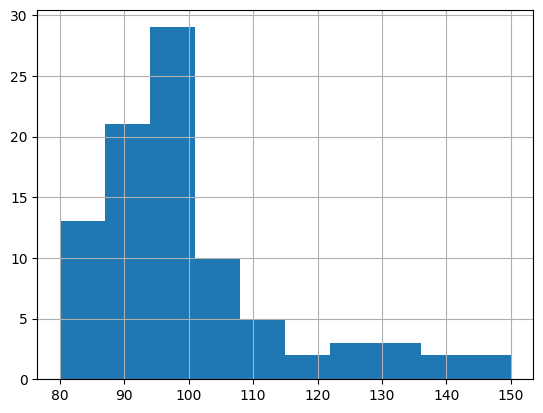

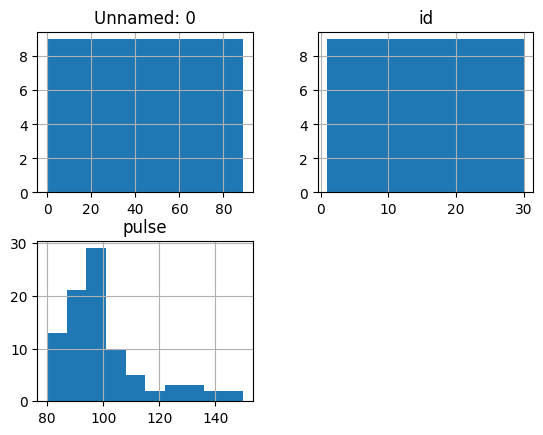

In [46]:
# Inspect histogram by numerical column
df['pulse'].hist()

# Inspect histogram for all numerical columns
df.hist()

# Show all plots 
plt.show()


### Observations

# Step 6. Initial Data Distribution for Categorical Columns

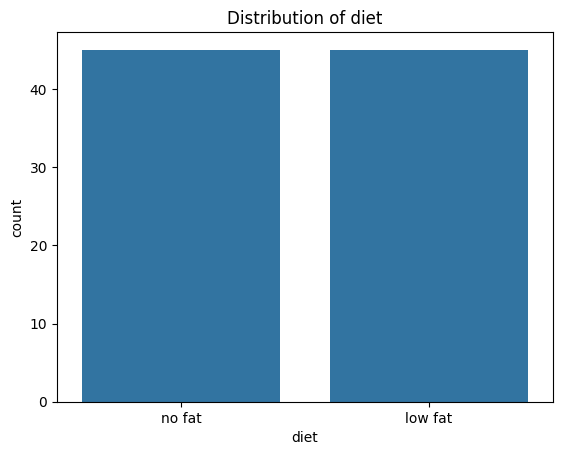

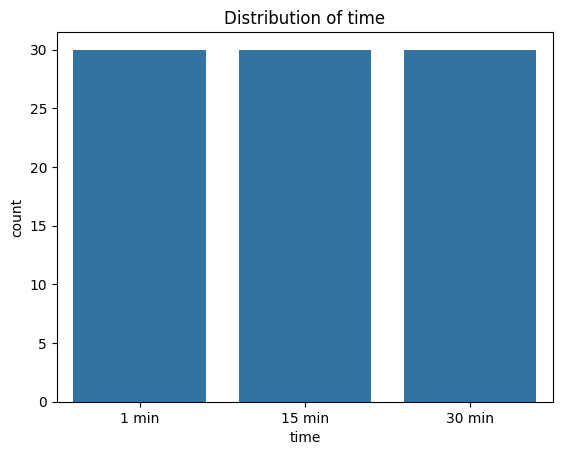

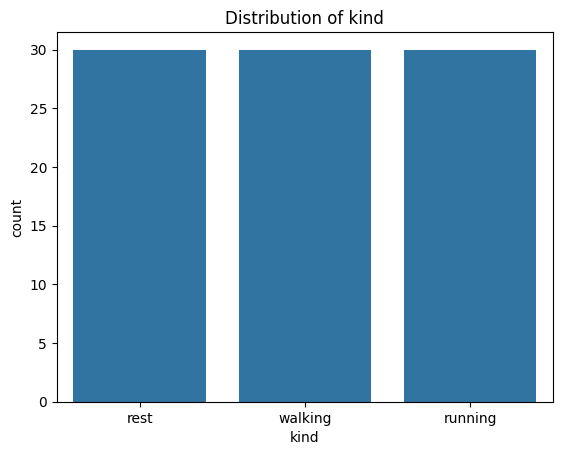

In [47]:
# Inspect value counts by categorical column
df['kind'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()